In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('Data\\Third\\附件3：飞行参数测量数据（剔除C）.xlsx', sheet_name='数据')
data

机型 落地主操控 落地主操控人员资质   TO_Date   TO Gate 1   TO Gate 2   TD Gate 3  \
0     A   人员4         F  20130104         500        1000        1500   
1     A   人员1         F  20130105         500        1000        1500   
2     A   人员1         F  20130105         500        1000        1500   
3     A   人员4         F  20130106         500        1000        1500   
4     A   人员1         F  20130107         500        1000        1500   
...  ..   ...       ...       ...         ...         ...         ...   
2362  A   人员1         T  20170829         500        1000        1500   
2363  A   人员1         T  20170829         500        1000        1500   
2364  A   人员1         T  20170829         500        1000        1500   
2365  A   人员1         T  20170829         500        1000        1500   
2366  A   人员2         T  20170901         500        1000        1500   

       TD Gate 2   TD Gate 1-1   V1_Method  ...   vfTD_MaxGduring  \
0           1000           500         NaN  ...             1.306   
1           1000           500         NaN  ...             1.303   
2           1000           500         NaN  ...             1.361   
3           1000           500         NaN  ...             1.177   
4           1000           500         NaN  ...             1.238   
...          ...           ...         ...  ...               ...   
2362        1000           500         NaN  ...             1.282   
2363        1000           500         NaN  ...             1.360   
2364        1000           500         NaN  ...             1.334   
2365        1000           500         NaN  ...             1.458   
2366        1000           500         NaN  ...             1.301   

      vfTD_MinGduring  vfTD_MaxLatGduring  Max(g)afterTD  Distance(TDto40kts)  \
0               0.825               0.090          1.169               1345.0   
1               0.842               0.055          1.158               1308.0   
2               0.814               0.066          1.131               1695.0   
3               0.880               0.145          1.157               1575.0   
4               0.796               0.078          1.007               1513.0   
...               ...                 ...            ...                  ...   
2362            0.840               0.102          1.235               1584.0   
2363            0.821               0.094          1.149               1345.0   
2364            0.861               0.078          1.131               1580.0   
2365            0.774               0.047          1.181               1244.0   
2366            0.801               0.090          1.090               1502.0   

       Time(ToAllT R)   Duration(T R)   MaxPwrWithT R   Min(GS)withT R  \
0                 4.0            23.0            69.0             51.0   
1                 5.0            23.0            69.0             45.0   
2                 4.0            24.0            71.0             60.0   
3                 6.0            22.0            72.0             58.0   
4                 4.0            21.0            68.0             61.0   
...               ...             ...             ...              ...   
2362              1.0            21.0            78.0             78.0   
2363              2.0            20.0            78.0             84.0   
2364              NaN             NaN             NaN              NaN   
2365              NaN             NaN             NaN              NaN   
2366              NaN             NaN             NaN              NaN   

       Turnoff_GS  
0            30.0  
1            21.0  
2            22.0  
3            28.0  
4            28.0  
...           ...  
2362         40.0  
2363         34.0  
2364         38.0  
2365         10.0  
2366         30.0  

[2367 rows x 197 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Columns: 197 entries, 机型 to  Turnoff_GS
dtypes: float64(177), int64(13), object(7)
memory usage: 3.6+ MB


In [4]:
data.isnull().sum()

机型                   0
落地主操控                0
落地主操控人员资质            0
 TO_Date             0
 TO Gate 1           0
                  ... 
 Time(ToAllT R)    144
 Duration(T R)     144
 MaxPwrWithT R     146
 Min(GS)withT R    146
 Turnoff_GS          3
Length: 197, dtype: int64

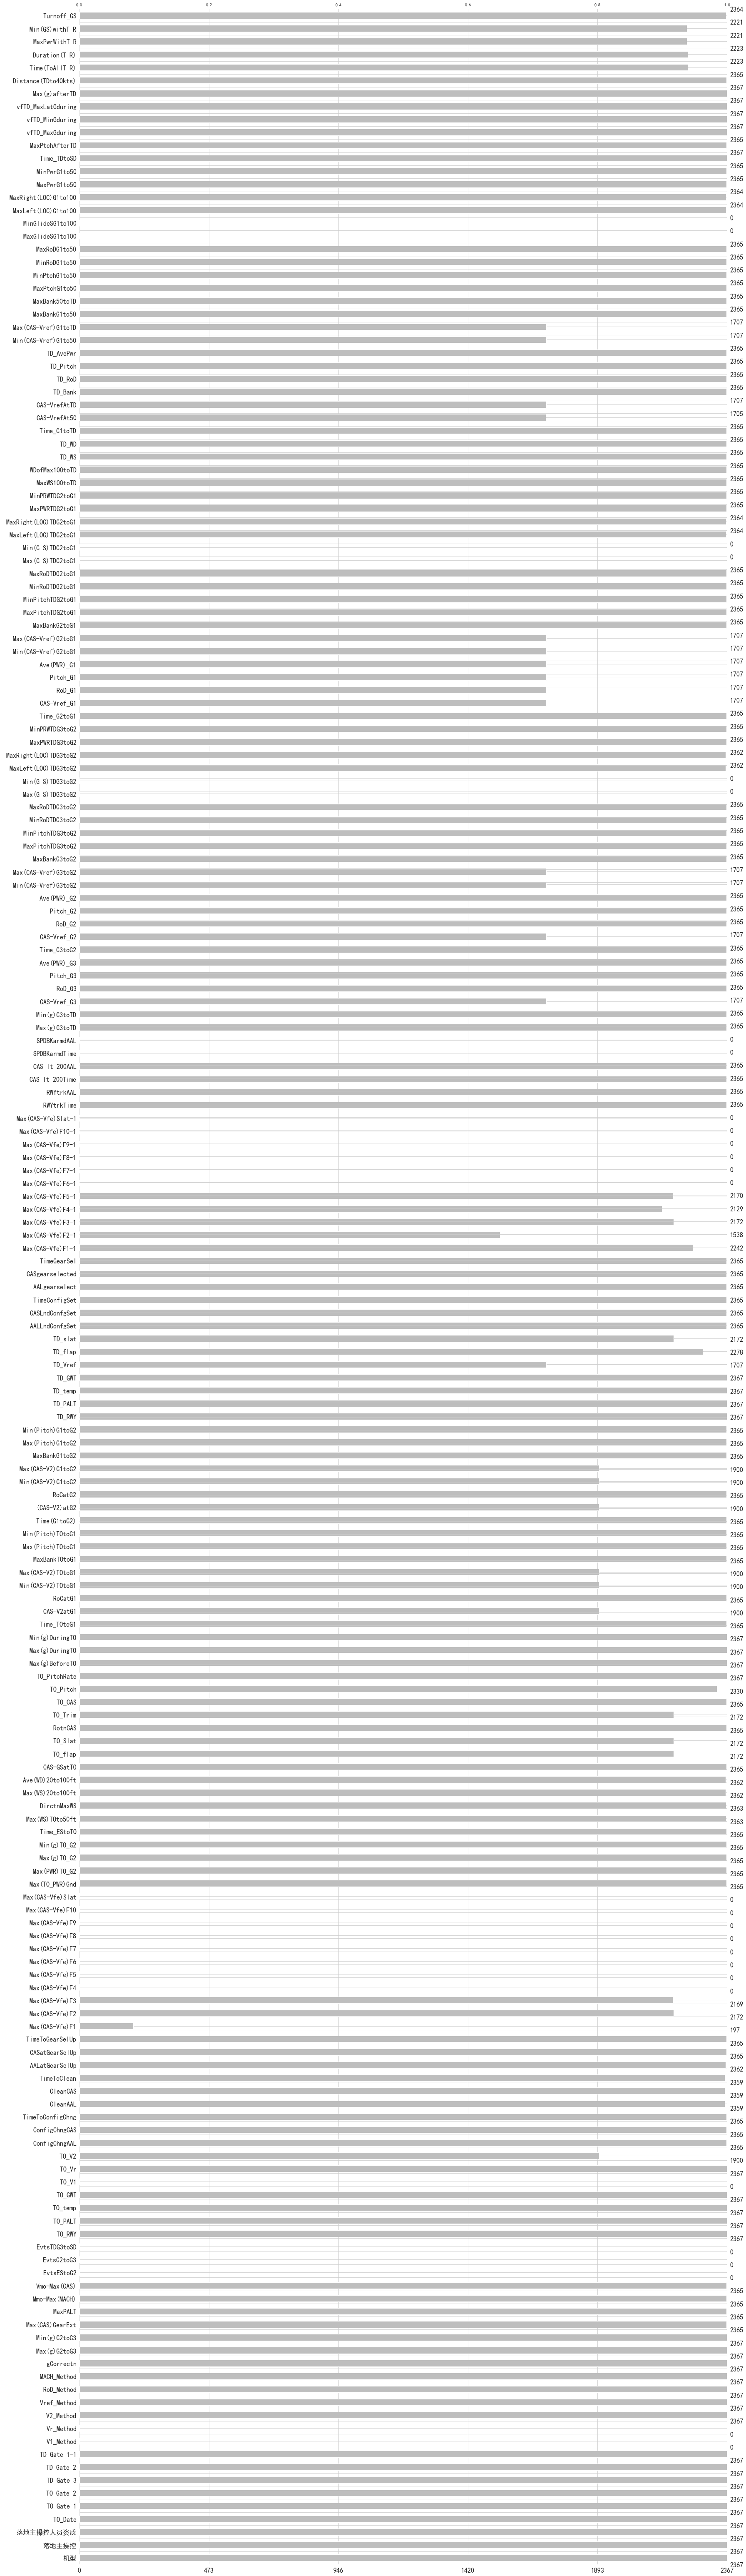

In [5]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(data, color=(190/255,190/255,190/255))
plt.tight_layout()
plt.savefig('Figures\\附件3缺失值.pdf')

In [6]:
data.drop(labels=['机型','落地主操控',' V1_Method',' Vr_Method',
                  ' EvtsEStoG2',' EvtsG2toG3',' EvtsTDG3toSD',' TO_V1',
                  ' TO_V2',' Max(CAS-Vfe)F1',' Max(CAS-Vfe)F4',' Max(CAS-Vfe)F5',
                  ' Max(CAS-Vfe)F6',' Max(CAS-Vfe)F7',' Max(CAS-Vfe)F8',' Max(CAS-Vfe)F9',
                  ' Max(CAS-Vfe)F10',' Max(CAS-Vfe)Slat',' CAS-V2atG1',' Min(CAS-V2)TOtoG1',
                  ' Max(CAS-V2)TOtoG1',' (CAS-V2)atG2',' Min(CAS-V2)G1toG2',' Max(CAS-V2)G1toG2',
                  ' TD_Vref',' Max(CAS-Vfe)F2-1',' Max(CAS-Vfe)F6-1',' Max(CAS-Vfe)F7-1',
                  ' Max(CAS-Vfe)F8-1',' Max(CAS-Vfe)F9-1',' Max(CAS-Vfe)F10-1',' Max(CAS-Vfe)Slat-1',
                  ' SPDBKarmdTime',' SPDBKarmdAAL',' CAS-Vref_G3',' CAS-Vref_G2',
                  ' Min(CAS-Vref)G3toG2',' Max(CAS-Vref)G3toG2',' Max(G S)TDG3toG2',' Min(G S)TDG3toG2',
                  ' CAS-Vref_G1',' RoD_G1',' Pitch_G1',' Ave(PWR)_G1',
                  ' Min(CAS-Vref)G2toG1',' Max(CAS-Vref)G2toG1',' Max(G S)TDG2toG1',' Min(G S)TDG2toG1',
                  ' CAS-VrefAt50',' CAS-VrefAtTD',' Min(CAS-Vref)G1to50',' Max(CAS-Vref)G1toTD',
                  ' MaxGlideSG1to100',' MinGlideSG1to100',
                  ' TO Gate 1',' TO Gate 2',' TD Gate 3',' TD Gate 2',' TD Gate 1-1', ' TO_Vr'],axis=1,inplace=True)
data

落地主操控人员资质   TO_Date  V2_Method  Vref_Method  RoD_Method  MACH_Method  \
0            F  20130104          R            R           R            C   
1            F  20130105          R            R           R            C   
2            F  20130105          R            R           R            C   
3            F  20130106          R            R           R            C   
4            F  20130107          R            R           R            C   
...        ...       ...        ...          ...         ...          ...   
2362         T  20170829          R            C           R            R   
2363         T  20170829          R            C           R            R   
2364         T  20170829          R            C           R            R   
2365         T  20170829          R            C           R            R   
2366         T  20170901          R            C           R            R   

       gCorrectn   Max(g)G2toG3   Min(g)G2toG3   Max(CAS)GearExt  ...  \
0         -0.021          1.195          0.840             175.9  ...   
1         -0.018          1.168          0.879             175.0  ...   
2         -0.021          1.207          0.898             179.5  ...   
3         -0.029          1.207          0.898             175.5  ...   
4          0.016          1.180          0.852             175.9  ...   
...          ...            ...            ...               ...  ...   
2362      -0.028          1.293          0.898             172.5  ...   
2363      -0.028          1.168          0.813             169.3  ...   
2364      -0.021          1.352          0.832             175.0  ...   
2365      -0.020          1.234          0.773             172.0  ...   
2366      -0.008          1.207          0.859             171.8  ...   

       vfTD_MaxGduring   vfTD_MinGduring   vfTD_MaxLatGduring   Max(g)afterTD  \
0                1.306             0.825                0.090           1.169   
1                1.303             0.842                0.055           1.158   
2                1.361             0.814                0.066           1.131   
3                1.177             0.880                0.145           1.157   
4                1.238             0.796                0.078           1.007   
...                ...               ...                  ...             ...   
2362             1.282             0.840                0.102           1.235   
2363             1.360             0.821                0.094           1.149   
2364             1.334             0.861                0.078           1.131   
2365             1.458             0.774                0.047           1.181   
2366             1.301             0.801                0.090           1.090   

       Distance(TDto40kts)   Time(ToAllT R)   Duration(T R)   MaxPwrWithT R  \
0                   1345.0              4.0            23.0            69.0   
1                   1308.0              5.0            23.0            69.0   
2                   1695.0              4.0            24.0            71.0   
3                   1575.0              6.0            22.0            72.0   
4                   1513.0              4.0            21.0            68.0   
...                    ...              ...             ...             ...   
2362                1584.0              1.0            21.0            78.0   
2363                1345.0              2.0            20.0            78.0   
2364                1580.0              NaN             NaN             NaN   
2365                1244.0              NaN             NaN             NaN   
2366                1502.0              NaN             NaN             NaN   

       Min(GS)withT R   Turnoff_GS  
0                51.0         30.0  
1                45.0         21.0  
2                60.0         22.0  
3                58.0         28.0  
4                61.0         28.0  
...               ...          ...  
2362             78.0 

In [7]:
data.isnull().sum()

落地主操控人员资质            0
 TO_Date             0
 V2_Method           0
 Vref_Method         0
 RoD_Method          0
                  ... 
 Time(ToAllT R)    144
 Duration(T R)     144
 MaxPwrWithT R     146
 Min(GS)withT R    146
 Turnoff_GS          3
Length: 137, dtype: int64

In [8]:
data.fillna(data.mode().iloc[0], inplace=True)
data

落地主操控人员资质   TO_Date  V2_Method  Vref_Method  RoD_Method  MACH_Method  \
0            F  20130104          R            R           R            C   
1            F  20130105          R            R           R            C   
2            F  20130105          R            R           R            C   
3            F  20130106          R            R           R            C   
4            F  20130107          R            R           R            C   
...        ...       ...        ...          ...         ...          ...   
2362         T  20170829          R            C           R            R   
2363         T  20170829          R            C           R            R   
2364         T  20170829          R            C           R            R   
2365         T  20170829          R            C           R            R   
2366         T  20170901          R            C           R            R   

       gCorrectn   Max(g)G2toG3   Min(g)G2toG3   Max(CAS)GearExt  ...  \
0         -0.021          1.195          0.840             175.9  ...   
1         -0.018          1.168          0.879             175.0  ...   
2         -0.021          1.207          0.898             179.5  ...   
3         -0.029          1.207          0.898             175.5  ...   
4          0.016          1.180          0.852             175.9  ...   
...          ...            ...            ...               ...  ...   
2362      -0.028          1.293          0.898             172.5  ...   
2363      -0.028          1.168          0.813             169.3  ...   
2364      -0.021          1.352          0.832             175.0  ...   
2365      -0.020          1.234          0.773             172.0  ...   
2366      -0.008          1.207          0.859             171.8  ...   

       vfTD_MaxGduring   vfTD_MinGduring   vfTD_MaxLatGduring   Max(g)afterTD  \
0                1.306             0.825                0.090           1.169   
1                1.303             0.842                0.055           1.158   
2                1.361             0.814                0.066           1.131   
3                1.177             0.880                0.145           1.157   
4                1.238             0.796                0.078           1.007   
...                ...               ...                  ...             ...   
2362             1.282             0.840                0.102           1.235   
2363             1.360             0.821                0.094           1.149   
2364             1.334             0.861                0.078           1.131   
2365             1.458             0.774                0.047           1.181   
2366             1.301             0.801                0.090           1.090   

       Distance(TDto40kts)   Time(ToAllT R)   Duration(T R)   MaxPwrWithT R  \
0                   1345.0              4.0            23.0            69.0   
1                   1308.0              5.0            23.0            69.0   
2                   1695.0              4.0            24.0            71.0   
3                   1575.0              6.0            22.0            72.0   
4                   1513.0              4.0            21.0            68.0   
...                    ...              ...             ...             ...   
2362                1584.0              1.0            21.0            78.0   
2363                1345.0              2.0            20.0            78.0   
2364                1580.0              4.0            21.0            73.0   
2365                1244.0              4.0            21.0            73.0   
2366                1502.0              4.0            21.0            73.0   

       Min(GS)withT R   Turnoff_GS  
0                51.0         30.0  
1                45.0         21.0  
2                60.0         22.0  
3                58.0         28.0  
4                61.0         28.0  
...               ...          ...  
2362             78.0 

In [9]:
data.isnull().sum()

落地主操控人员资质          0
 TO_Date           0
 V2_Method         0
 Vref_Method       0
 RoD_Method        0
                  ..
 Time(ToAllT R)    0
 Duration(T R)     0
 MaxPwrWithT R     0
 Min(GS)withT R    0
 Turnoff_GS        0
Length: 137, dtype: int64

In [10]:
data

落地主操控人员资质   TO_Date  V2_Method  Vref_Method  RoD_Method  MACH_Method  \
0            F  20130104          R            R           R            C   
1            F  20130105          R            R           R            C   
2            F  20130105          R            R           R            C   
3            F  20130106          R            R           R            C   
4            F  20130107          R            R           R            C   
...        ...       ...        ...          ...         ...          ...   
2362         T  20170829          R            C           R            R   
2363         T  20170829          R            C           R            R   
2364         T  20170829          R            C           R            R   
2365         T  20170829          R            C           R            R   
2366         T  20170901          R            C           R            R   

       gCorrectn   Max(g)G2toG3   Min(g)G2toG3   Max(CAS)GearExt  ...  \
0         -0.021          1.195          0.840             175.9  ...   
1         -0.018          1.168          0.879             175.0  ...   
2         -0.021          1.207          0.898             179.5  ...   
3         -0.029          1.207          0.898             175.5  ...   
4          0.016          1.180          0.852             175.9  ...   
...          ...            ...            ...               ...  ...   
2362      -0.028          1.293          0.898             172.5  ...   
2363      -0.028          1.168          0.813             169.3  ...   
2364      -0.021          1.352          0.832             175.0  ...   
2365      -0.020          1.234          0.773             172.0  ...   
2366      -0.008          1.207          0.859             171.8  ...   

       vfTD_MaxGduring   vfTD_MinGduring   vfTD_MaxLatGduring   Max(g)afterTD  \
0                1.306             0.825                0.090           1.169   
1                1.303             0.842                0.055           1.158   
2                1.361             0.814                0.066           1.131   
3                1.177             0.880                0.145           1.157   
4                1.238             0.796                0.078           1.007   
...                ...               ...                  ...             ...   
2362             1.282             0.840                0.102           1.235   
2363             1.360             0.821                0.094           1.149   
2364             1.334             0.861                0.078           1.131   
2365             1.458             0.774                0.047           1.181   
2366             1.301             0.801                0.090           1.090   

       Distance(TDto40kts)   Time(ToAllT R)   Duration(T R)   MaxPwrWithT R  \
0                   1345.0              4.0            23.0            69.0   
1                   1308.0              5.0            23.0            69.0   
2                   1695.0              4.0            24.0            71.0   
3                   1575.0              6.0            22.0            72.0   
4                   1513.0              4.0            21.0            68.0   
...                    ...              ...             ...             ...   
2362                1584.0              1.0            21.0            78.0   
2363                1345.0              2.0            20.0            78.0   
2364                1580.0              4.0            21.0            73.0   
2365                1244.0              4.0            21.0            73.0   
2366                1502.0              4.0            21.0            73.0   

       Min(GS)withT R   Turnoff_GS  
0                51.0         30.0  
1                45.0         21.0  
2                60.0         22.0  
3                58.0         28.0  
4                61.0         28.0  
...               ...          ...  
2362             78.0 

In [11]:
#标签编码
import sklearn.preprocessing as sp
le=sp.LabelEncoder()

Competency=le.fit_transform(data["落地主操控人员资质"])
V2Method=le.fit_transform(data[" V2_Method"])
Vref_Method=le.fit_transform(data[" Vref_Method"])
RoDMethod=le.fit_transform(data[" RoD_Method"])
MACHMethod=le.fit_transform(data[" MACH_Method"])

data["落地主操控人员资质"]=pd.DataFrame(Competency)
data[" V2_Method"]=pd.DataFrame(V2Method)
data[" Vref_Method"]=pd.DataFrame(Vref_Method)
data[" RoD_Method"]=pd.DataFrame(RoDMethod)
data[" MACH_Method"]=pd.DataFrame(MACHMethod)
data

落地主操控人员资质   TO_Date   V2_Method   Vref_Method   RoD_Method  \
0             1  20130104           1             1            1   
1             1  20130105           1             1            1   
2             1  20130105           1             1            1   
3             1  20130106           1             1            1   
4             1  20130107           1             1            1   
...         ...       ...         ...           ...          ...   
2362          4  20170829           1             0            1   
2363          4  20170829           1             0            1   
2364          4  20170829           1             0            1   
2365          4  20170829           1             0            1   
2366          4  20170901           1             0            1   

       MACH_Method   gCorrectn   Max(g)G2toG3   Min(g)G2toG3  \
0                0      -0.021          1.195          0.840   
1                0      -0.018          1.168          0.879   
2                0      -0.021          1.207          0.898   
3                0      -0.029          1.207          0.898   
4                0       0.016          1.180          0.852   
...            ...         ...            ...            ...   
2362             1      -0.028          1.293          0.898   
2363             1      -0.028          1.168          0.813   
2364             1      -0.021          1.352          0.832   
2365             1      -0.020          1.234          0.773   
2366             1      -0.008          1.207          0.859   

       Max(CAS)GearExt  ...   vfTD_MaxGduring   vfTD_MinGduring  \
0                175.9  ...             1.306             0.825   
1                175.0  ...             1.303             0.842   
2                179.5  ...             1.361             0.814   
3                175.5  ...             1.177             0.880   
4                175.9  ...             1.238             0.796   
...                ...  ...               ...               ...   
2362             172.5  ...             1.282             0.840   
2363             169.3  ...             1.360             0.821   
2364             175.0  ...             1.334             0.861   
2365             172.0  ...             1.458             0.774   
2366             171.8  ...             1.301             0.801   

       vfTD_MaxLatGduring   Max(g)afterTD   Distance(TDto40kts)  \
0                   0.090           1.169                1345.0   
1                   0.055           1.158                1308.0   
2                   0.066           1.131                1695.0   
3                   0.145           1.157                1575.0   
4                   0.078           1.007                1513.0   
...                   ...             ...                   ...   
2362                0.102           1.235                1584.0   
2363                0.094           1.149                1345.0   
2364                0.078           1.131                1580.0   
2365                0.047           1.181                1244.0   
2366                0.090           1.090                1502.0   

       Time(ToAllT R)   Duration(T R)   MaxPwrWithT R   Min(GS)withT R  \
0                 4.0            23.0            69.0             51.0   
1                 5.0            23.0            69.0             45.0   
2                 4.0            24.0            71.0             60.0   
3                 6.0            22.0            72.0             58.0   
4                 4.0            21.0            68.0             61.0   
...               ...             ...             ...              ...   
2362              1.0            21.0            78.0             78.0   
2363              2.0            20.0            78.0             84.0   
2364              4.0            21.0            73.0             60.0   
2365              4.0            21.0            73.0             60.0

In [12]:
#数据标准化
StandardTransform = data.loc[:,~data.columns.isin(['落地主操控人员资质',' V2_Method',' Vref_Method',' RoD_Method',' MACH_Method'])]
StandardTransform

TO_Date   gCorrectn   Max(g)G2toG3   Min(g)G2toG3   Max(CAS)GearExt  \
0     20130104      -0.021          1.195          0.840             175.9   
1     20130105      -0.018          1.168          0.879             175.0   
2     20130105      -0.021          1.207          0.898             179.5   
3     20130106      -0.029          1.207          0.898             175.5   
4     20130107       0.016          1.180          0.852             175.9   
...        ...         ...            ...            ...               ...   
2362  20170829      -0.028          1.293          0.898             172.5   
2363  20170829      -0.028          1.168          0.813             169.3   
2364  20170829      -0.021          1.352          0.832             175.0   
2365  20170829      -0.020          1.234          0.773             172.0   
2366  20170901      -0.008          1.207          0.859             171.8   

       MaxPALT   Mmo-Max(MACH)   Vmo-Max(CAS)   TO_RWY   TO_PALT  ...  \
0      33116.0          -0.027          -31.6     72.7    -168.0  ...   
1      33124.0          -0.045          -39.3     23.8    1288.0  ...   
2      34116.0          -0.041          -47.3    360.2    -315.6  ...   
3      32148.0          -0.042          -31.4     -0.4    -374.8  ...   
4      29160.0          -0.065          -50.0    359.6    -251.3  ...   
...        ...             ...            ...      ...       ...  ...   
2362   22612.0          -0.132          -44.0    258.0    3376.0  ...   
2363   21716.0          -0.143          -46.5    359.7      56.0  ...   
2364   26616.0          -0.095          -45.3     32.9    3475.3  ...   
2365   27618.0          -0.059          -46.9    359.8    -130.8  ...   
2366   34112.0          -0.044          -41.4    337.9     164.7  ...   

       vfTD_MaxGduring   vfTD_MinGduring   vfTD_MaxLatGduring   Max(g)afterTD  \
0                1.306             0.825                0.090           1.169   
1                1.303             0.842                0.055           1.158   
2                1.361             0.814                0.066           1.131   
3                1.177             0.880                0.145           1.157   
4                1.238             0.796                0.078           1.007   
...                ...               ...                  ...             ...   
2362             1.282             0.840                0.102           1.235   
2363             1.360             0.821                0.094           1.149   
2364             1.334             0.861                0.078           1.131   
2365             1.458             0.774                0.047           1.181   
2366             1.301             0.801                0.090           1.090   

       Distance(TDto40kts)   Time(ToAllT R)   Duration(T R)   MaxPwrWithT R  \
0                   1345.0              4.0            23.0            69.0   
1                   1308.0              5.0            23.0            69.0   
2                   1695.0              4.0            24.0            71.0   
3                   1575.0              6.0            22.0            72.0   
4                   1513.0              4.0            21.0            68.0   
...                    ...              ...             ...             ...   
2362                1584.0              1.0            21.0            78.0   
2363                1345.0              2.0            20.0            78.0   
2364                1580.0              4.0            21.0            73.0   
2365                1244.0              4.0            21.0            73.0   
2366                1502.0              4.0            21.0            73.0   

       Min(GS)withT R   Turnoff_GS  
0                51.0         30.0  
1                45.0         21.0  
2                60.0         22.0  
3                58.0         28.0  
4                61.0         28.0  
...               ...          ...  
2362        

In [13]:
ListDataColumns=list(StandardTransform.columns)
ListDataColumns

[' TO_Date',
 ' gCorrectn',
 ' Max(g)G2toG3',
 ' Min(g)G2toG3',
 ' Max(CAS)GearExt',
 ' MaxPALT',
 ' Mmo-Max(MACH)',
 ' Vmo-Max(CAS)',
 ' TO_RWY',
 ' TO_PALT',
 ' TO_temp',
 ' TO_GWT',
 ' ConfigChngAAL',
 ' ConfigChngCAS',
 ' TimeToConfigChng',
 ' CleanAAL',
 ' CleanCAS',
 ' TimeToClean',
 ' AALatGearSelUp',
 ' CASatGearSelUp',
 ' TimeToGearSelUp',
 ' Max(CAS-Vfe)F2',
 ' Max(CAS-Vfe)F3',
 ' Max(TO_PWR)Gnd',
 ' Max(PWR)TO_G2',
 ' Max(g)TO_G2',
 ' Min(g)TO_G2',
 ' Time_EStoTO',
 ' Max(WS)TOto50ft',
 ' DirctnMaxWS',
 ' Max(WS)20to100ft',
 ' Ave(WD)20to100ft',
 ' CAS-GSatTO',
 ' TO_flap',
 ' TO_Slat',
 ' RotnCAS',
 ' TO_Trim',
 ' TO_CAS',
 ' TO_Pitch',
 ' TO_PitchRate',
 ' Max(g)BeforeTO',
 ' Max(g)DuringTO',
 ' Min(g)DuringTO',
 ' Time_TOtoG1',
 ' RoCatG1',
 ' MaxBankTOtoG1',
 ' Max(Pitch)TOtoG1',
 ' Min(Pitch)TOtoG1',
 ' Time(G1toG2)',
 ' RoCatG2',
 ' MaxBankG1toG2',
 ' Max(Pitch)G1toG2',
 ' Min(Pitch)G1toG2',
 ' TD_RWY',
 ' TD_PALT',
 ' TD_temp',
 ' TD_GWT',
 ' TD_flap',
 ' TD_slat',
 '

In [14]:
StandardTransformScaler = sp.StandardScaler()
StandardTransformScaler = StandardTransformScaler.fit(StandardTransform)
StandardTransform = StandardTransformScaler.transform(StandardTransform)
StandardTransform = pd.DataFrame(StandardTransform)
StandardTransform.columns = ListDataColumns
StandardTransform

TO_Date   gCorrectn   Max(g)G2toG3   Min(g)G2toG3   Max(CAS)GearExt  \
0    -1.391332   -0.617028      -0.517311       0.409031          0.001112   
1    -1.391244   -0.427598      -0.931674       0.972765         -0.139108   
2    -1.391244   -0.617028      -0.333149       1.247404          0.561994   
3    -1.391155   -1.122175      -0.333149       1.247404         -0.061208   
4    -1.391066    1.719276      -0.747513       0.582488          0.001112   
...        ...         ...            ...            ...               ...   
2362  2.215031   -1.059032       0.986675       1.247404         -0.528609   
2363  2.215031   -1.059032      -0.931674       0.018754         -1.027171   
2364  2.215031   -0.617028       1.892136       0.293393         -0.139108   
2365  2.215031   -0.553885       0.081214      -0.559435         -0.606510   
2366  2.221407    0.203835      -0.333149       0.683671         -0.637670   

       MaxPALT   Mmo-Max(MACH)   Vmo-Max(CAS)    TO_RWY   TO_PALT  ...  \
0     0.971172        1.317577       0.881179 -0.769871 -0.653874  ...   
1     0.973592        0.489651       0.006064 -1.113188  1.539549  ...   
2     1.273698        0.673635      -0.903146  1.248607 -0.876229  ...   
3     0.678326        0.627639       0.903910 -1.283091 -0.965413  ...   
4    -0.225624       -0.430267      -1.210005  1.244395 -0.779363  ...   
...        ...             ...            ...       ...       ...  ...   
2362 -2.206568       -3.511992      -0.528097  0.531082  4.685063  ...   
2363 -2.477632       -4.017947      -0.812225  1.245097 -0.316424  ...   
2364 -0.995251       -1.810144      -0.675844 -1.049299  4.834656  ...   
2365 -0.692120       -0.154291      -0.857686  1.245799 -0.597833  ...   
2366  1.272488        0.535647      -0.232603  1.092044 -0.152671  ...   

       vfTD_MaxGduring   vfTD_MinGduring   vfTD_MaxLatGduring   Max(g)afterTD  \
0            -0.267749          0.299133            -0.080110        0.807173   
1            -0.299590          0.536111            -0.970940        0.632509   
2             0.316001          0.145794            -0.690965        0.203791   
3            -1.636907          1.065826             1.319766        0.616631   
4            -0.989476         -0.105123            -0.385537       -1.765140   
...                ...               ...                  ...             ...   
2362         -0.522476          0.508231             0.225318        1.855152   
2363          0.305387          0.243374             0.021700        0.489603   
2364          0.029433          0.800969            -0.385537        0.203791   
2365          1.345523         -0.411800            -1.174558        0.997714   
2366         -0.320817         -0.035424            -0.080110       -0.447227   

       Distance(TDto40kts)   Time(ToAllT R)   Duration(T R)   MaxPwrWithT R  \
0                -0.267166        -0.564421        0.345453       -1.497848   
1                -0.453071         0.265899        0.345453       -1.497848   
2                 1.491403        -0.564421        0.536278       -0.840744   
3                 0.888465         1.096219        0.154627       -0.512192   
4                 0.576947        -0.564421       -0.036198       -1.826400   
...                    ...              ...             ...             ...   
2362              0.933685        -3.055383       -0.036198        1.459121   
2363             -0.267166        -2.225062       -0.227023        1.459121   
2364              0.913587        -0.564421       -0.036198       -0.183639   
2365             -0.774638        -0.564421       -0.036198       -0.183639   
2366              0.521678        -0.564421       -0.036198       -0.183639   

       Min(GS)withT R   Turnoff_GS  
0           -0.331170     0.508498  
1           -0.755654    -1.074049  
2            0.305555    -0.898211  
3            0.164061     0.156821  
4            0.376303     0.156821  
...               ...          ...  


In [15]:
dataLeave=data[['落地主操控人员资质',' V2_Method',' Vref_Method',' RoD_Method',' MACH_Method']]
dataLeave

落地主操控人员资质   V2_Method   Vref_Method   RoD_Method   MACH_Method
0             1           1             1            1             0
1             1           1             1            1             0
2             1           1             1            1             0
3             1           1             1            1             0
4             1           1             1            1             0
...         ...         ...           ...          ...           ...
2362          4           1             0            1             1
2363          4           1             0            1             1
2364          4           1             0            1             1
2365          4           1             0            1             1
2366          4           1             0            1             1

[2367 rows x 5 columns]

In [16]:
dataNew=pd.concat([dataLeave, StandardTransform],axis=1)
dataNew

落地主操控人员资质   V2_Method   Vref_Method   RoD_Method   MACH_Method  \
0             1           1             1            1             0   
1             1           1             1            1             0   
2             1           1             1            1             0   
3             1           1             1            1             0   
4             1           1             1            1             0   
...         ...         ...           ...          ...           ...   
2362          4           1             0            1             1   
2363          4           1             0            1             1   
2364          4           1             0            1             1   
2365          4           1             0            1             1   
2366          4           1             0            1             1   

       TO_Date   gCorrectn   Max(g)G2toG3   Min(g)G2toG3   Max(CAS)GearExt  \
0    -1.391332   -0.617028      -0.517311       0.409031          0.001112   
1    -1.391244   -0.427598      -0.931674       0.972765         -0.139108   
2    -1.391244   -0.617028      -0.333149       1.247404          0.561994   
3    -1.391155   -1.122175      -0.333149       1.247404         -0.061208   
4    -1.391066    1.719276      -0.747513       0.582488          0.001112   
...        ...         ...            ...            ...               ...   
2362  2.215031   -1.059032       0.986675       1.247404         -0.528609   
2363  2.215031   -1.059032      -0.931674       0.018754         -1.027171   
2364  2.215031   -0.617028       1.892136       0.293393         -0.139108   
2365  2.215031   -0.553885       0.081214      -0.559435         -0.606510   
2366  2.221407    0.203835      -0.333149       0.683671         -0.637670   

      ...   vfTD_MaxGduring   vfTD_MinGduring   vfTD_MaxLatGduring  \
0     ...         -0.267749          0.299133            -0.080110   
1     ...         -0.299590          0.536111            -0.970940   
2     ...          0.316001          0.145794            -0.690965   
3     ...         -1.636907          1.065826             1.319766   
4     ...         -0.989476         -0.105123            -0.385537   
...   ...               ...               ...                  ...   
2362  ...         -0.522476          0.508231             0.225318   
2363  ...          0.305387          0.243374             0.021700   
2364  ...          0.029433          0.800969            -0.385537   
2365  ...          1.345523         -0.411800            -1.174558   
2366  ...         -0.320817         -0.035424            -0.080110   

       Max(g)afterTD   Distance(TDto40kts)   Time(ToAllT R)   Duration(T R)  \
0           0.807173             -0.267166        -0.564421        0.345453   
1           0.632509             -0.453071         0.265899        0.345453   
2           0.203791              1.491403        -0.564421        0.536278   
3           0.616631              0.888465         1.096219        0.154627   
4          -1.765140              0.576947        -0.564421       -0.036198   
...              ...                   ...              ...             ...   
2362        1.855152              0.933685        -3.055383       -0.036198   
2363        0.489603             -0.267166        -2.225062       -0.227023   
2364        0.203791              0.913587        -0.564421       -0.036198   
2365        0.997714             -0.774638        -0.564421       -0.036198   
2366       -0.447227              0.521678        -0.564421       -0.036198   

       MaxPwrWithT R   Min(GS)withT R   Turnoff_GS  
0          -1.497848        -0.331170     0.508498  
1          -1.497848        -0.755654    -1.074049  
2          -0.840744         0.305555    -0.898211  
3          -0.512192         0.164061     0.156821  
4          -1.826400         0.376303     0.156821  
...              ...              ...          ...  
2362        1.459121         1.579007     2

In [17]:
y=dataNew["落地主操控人员资质"]
X=dataNew.loc[:,~dataNew.columns.isin(['落地主操控人员资质'])]

In [18]:
#数据集划分
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2023)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(random_state=2023)
DecisionTree = DecisionTree.fit(X_train, y_train)

RandomForest = RandomForestClassifier(random_state=2023)
RandomForest = RandomForest.fit(X_train, y_train)
RandomForest_score = RandomForest.score(X_test, y_test)
RandomForest_score

0.679324894514768

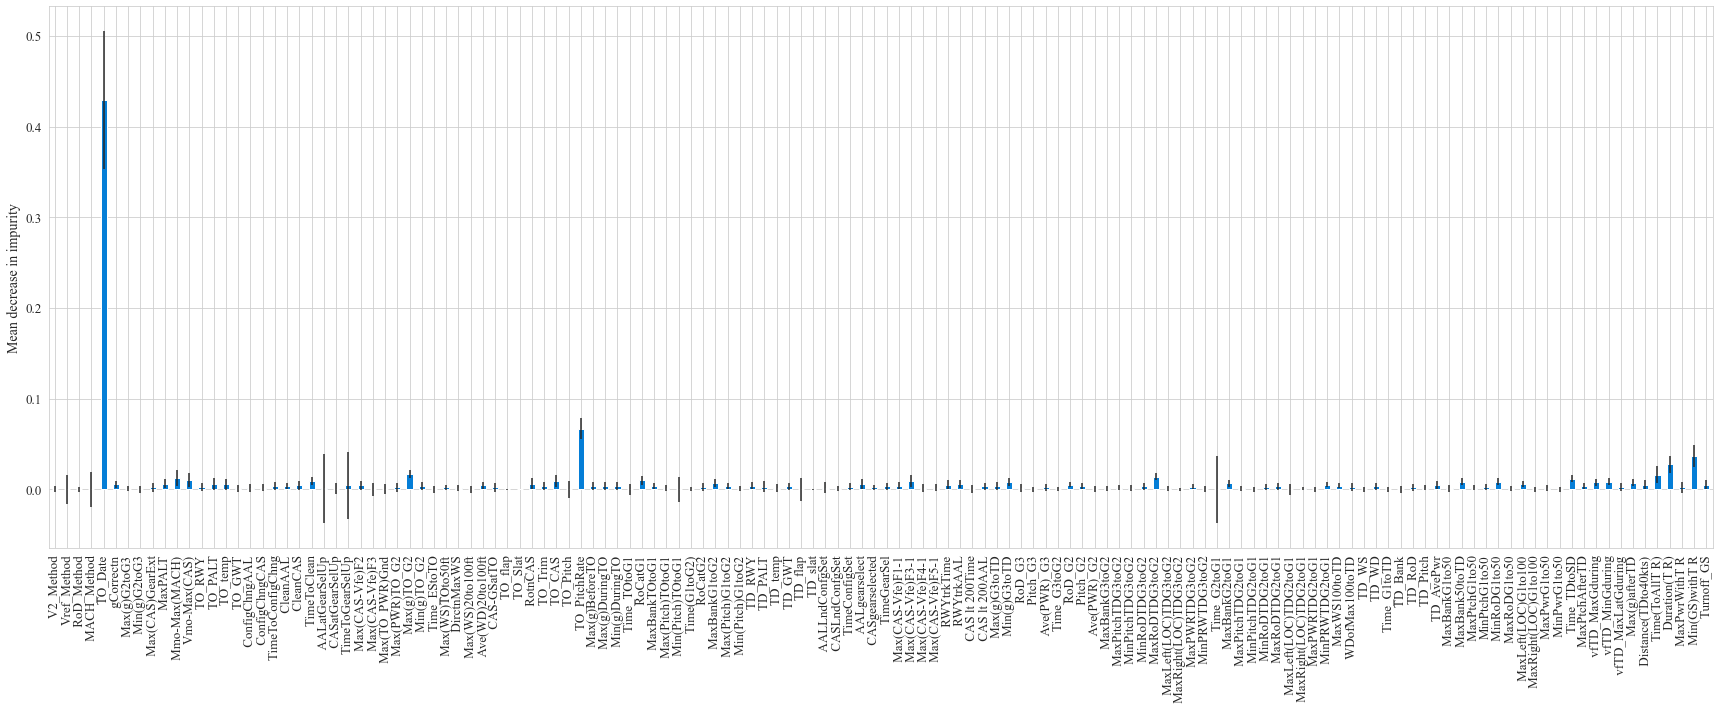

In [20]:
std = np.std([i.feature_importances_ for i in RandomForest.estimators_], axis=0)
importances = DecisionTree.feature_importances_
feat_with_importance = pd.Series(importances, X.columns)
fig, ax = plt.subplots(figsize=(24,10))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,126/255,215/255))
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman',size=14)
plt.yticks(font='Times New Roman',size=13)
plt.xticks(font='Times New Roman',size=13)
plt.tight_layout()
plt.savefig('Figures\\feature_importance_RF.pdf')

In [21]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
XGB_score = XGB.score(X_test, y_test)
XGB_score

0.8565400843881856

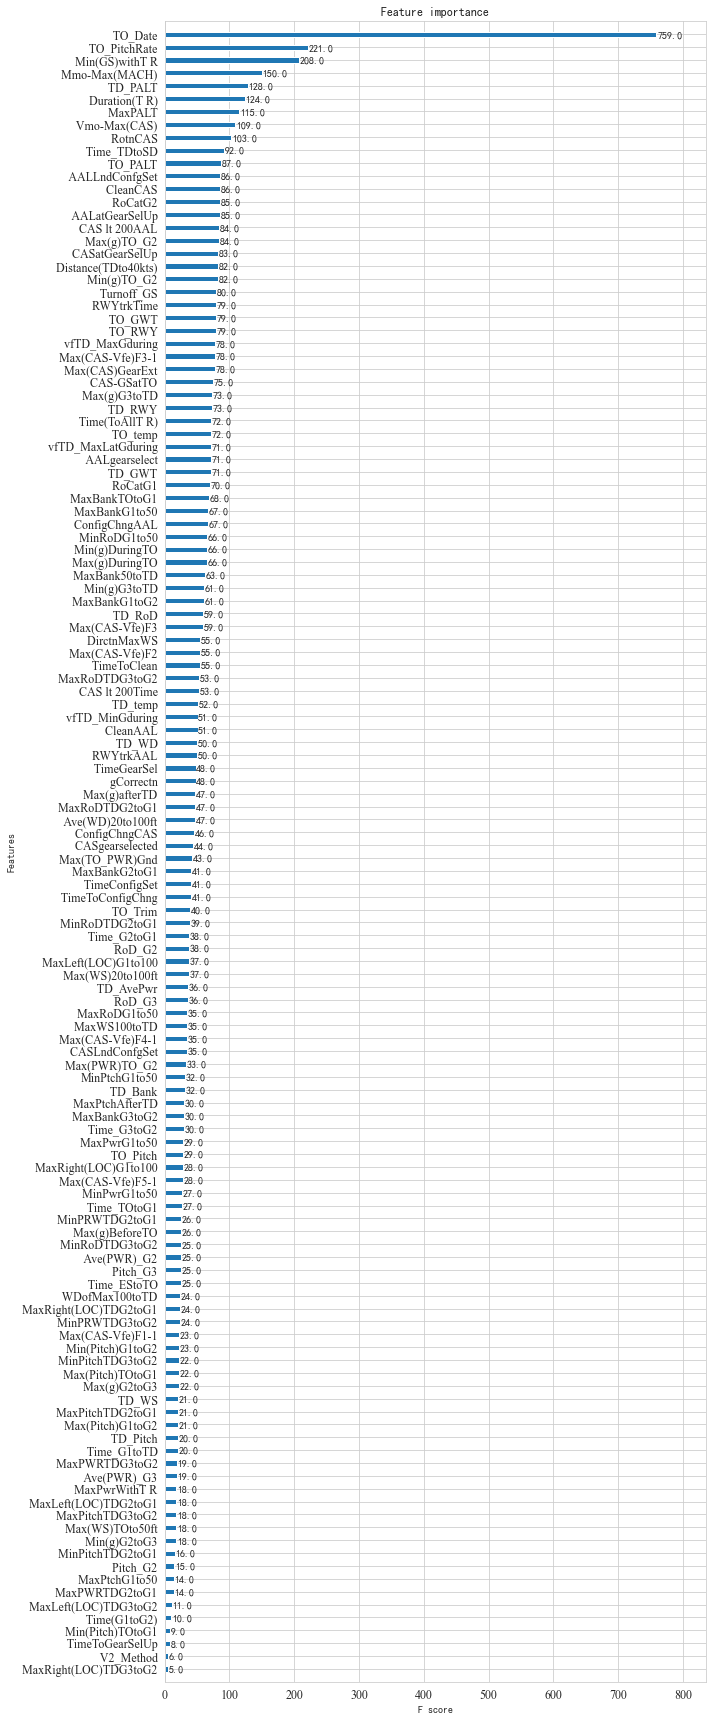

In [22]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,24))
plot_importance(XGB, height=0.4, ax=ax)
plt.xticks(fontsize=12, font='Times New Roman')
plt.yticks(fontsize=12, font='Times New Roman')
plt.tight_layout()
plt.savefig('Figures\\feature_importance_XGB.pdf')

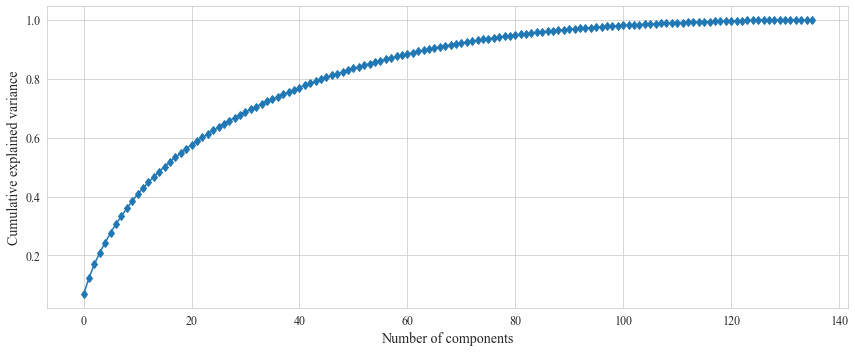

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
evr = pca.explained_variance_ratio_

plt.figure(figsize=(12, 5))
plt.plot(range(0, len(evr)), evr.cumsum(), marker="d", linestyle="-")
plt.xlabel("Number of components",font='Times New Roman',size=14)
plt.ylabel("Cumulative explained variance",font='Times New Roman',size=14)
plt.xticks(font='Times New Roman',size=12)
plt.yticks(font='Times New Roman',size=12)
plt.tight_layout()
plt.savefig('Figures\\资质PCA累计方差解释.pdf')

In [24]:
#降维
y=dataNew["落地主操控人员资质"]
X=dataNew.loc[:,~dataNew.columns.isin(['落地主操控人员资质',' CASgearselected',' MinPRWTDG2toG1',' MaxLeft(LOC)TDG2toG1',' V2_Method',' MaxRight(LOC)TDG3toG2'])]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2023)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(random_state=2023)
DecisionTree = DecisionTree.fit(X_train, y_train)

RandomForest = RandomForestClassifier(random_state=2023)
RandomForest = RandomForest.fit(X_train, y_train)
RandomForest_score = RandomForest.score(X_test, y_test)
RandomForest_score

0.6835443037974683

In [26]:
from xgboost import XGBClassifier

XGB = XGBClassifier(random_state=2023,)
XGB.fit(X_train, y_train)
XGB_score = XGB.score(X_test, y_test)
XGB_score

0.8523206751054853

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [28]:
print(f'XGBoost平均绝对误差：'
      f'{mean_absolute_error(y_test, XGB.predict(X_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'XGBoost均方误差：'
      f'{mean_squared_error(y_test, XGB.predict(X_test), sample_weight=None, multioutput="uniform_average")}')

XGBoost平均绝对误差：0.29535864978902954
XGBoost均方误差：0.7172995780590717


<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

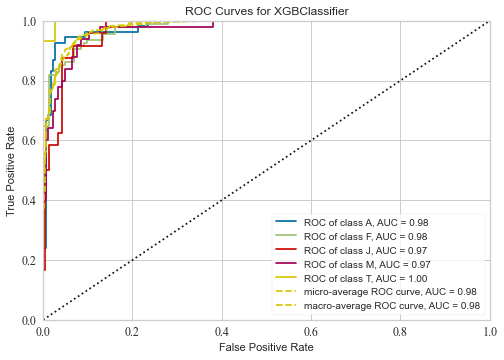

In [29]:
from yellowbrick.classifier import ROCAUC
classes=['A','F','J','M','T']
visualizer = ROCAUC(XGB, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='Figures\\ROCAUC.pdf')

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

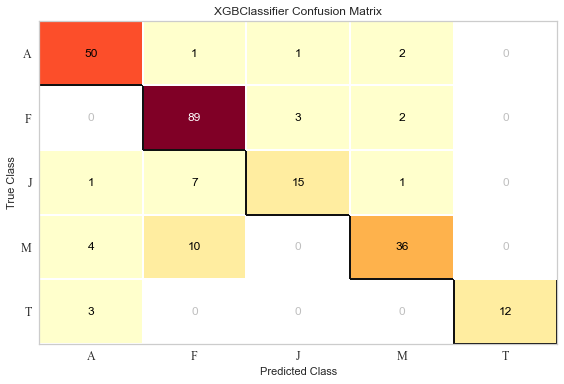

In [30]:
from yellowbrick.classifier import ConfusionMatrix
classes=['A','F','J','M','T']
confusion_matrix = ConfusionMatrix(XGB, classes=classes)
confusion_matrix.fit(X_train, y_train)
confusion_matrix.score(X_test, y_test)
plt.xticks(font='Times New Roman',rotation=0)
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='Figures\\ConfusionMatrix.pdf')

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

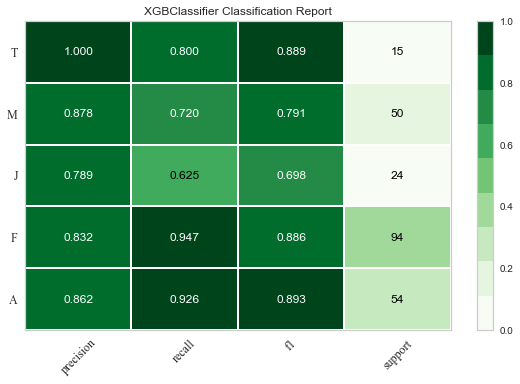

In [31]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(XGB, classes=classes, support=True, cmap='Greens')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='Figures\\ClassificationReport.pdf')

In [32]:
from sklearn.model_selection import cross_val_score
XGB_5K = cross_val_score(estimator=XGB,X=X_train,y=y_train,cv=5)
print(XGB_5K, '\n', XGB_5K.mean())
print(XGB_5K.std())

[0.80985915 0.80516432 0.79812207 0.83802817 0.81220657] 
 0.812676056338028
0.013558243265909539
